# Digital-Digital conversion techniques (Line Coding)
## 3. Write a program to simulate the digital-digital conversion techniques NRZ, NRZ-L, Manchester and Differential Manchester.
### Reg no : 2018331068

## Importing numpy and matplotlib.pyplot to plot the data

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# NRZ (Non-Return-to-Zero)  
In *NRZ* the positive voltage defines bit 1 and the zero voltage defines bit 0.  
It is called NRZ because the signal does not return to zero at the middle of the bit.  

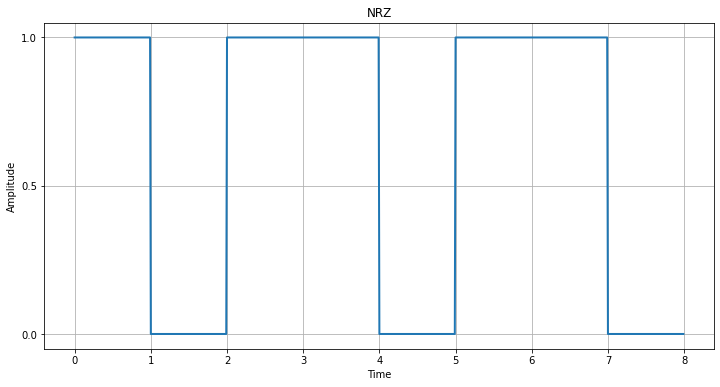

In [21]:
def plotNRZ(data):
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)
    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.zeros(100)))
        elif bit=='1':
            y=np.concatenate((y,np.ones(100)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('NRZ')
    plt.yticks([0,0.5,1])
    plt.grid('on')
    plt.show()

# For Taking Data Manually
# data=input("Input Binary Data Stream : ")
data = "10110110"
plotNRZ(data)

# NRZ-L
In *NRZ-L* the level of the voltage determines the value of the bit  
We assume bit 0 is represented by a positive voltage and bit 1 is represented by a negative voltage.  

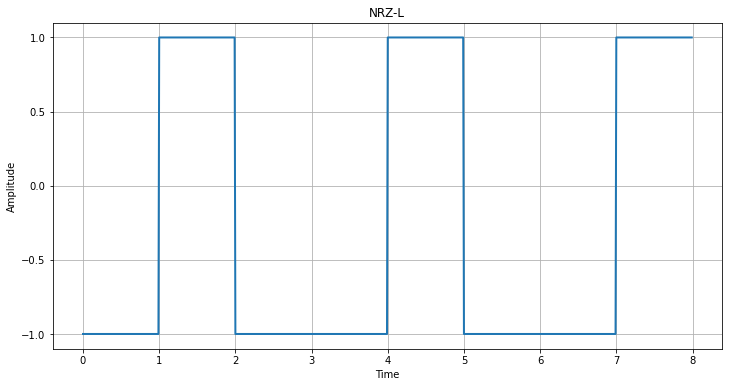

In [22]:
def plotNRZL(data):
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)
    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.ones(100)*(1)))
        elif bit=='1':
            y=np.concatenate((y,np.ones(100)*(-1)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('NRZ-L')
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.show()

# For Taking Data Manually
# data=input("Input Binary Data Stream : ")
data = "10110110"
plotNRZL(data)

# Manchester 
In Manchester encoding, the duration of the bit is divided into two halves.  
The voltage remains at one level during the first half and moves to the other level in the second half.  
If the bit is 0 then its moves -1 to 1 and if the bit is 1 then is moves otherwise.

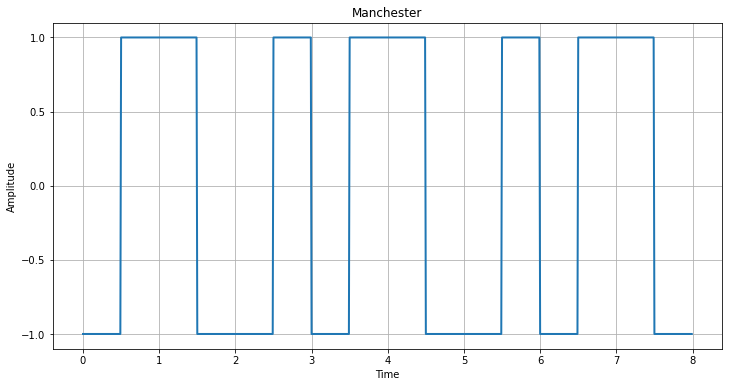

In [23]:
def plotManchester(data):
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)
    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
        elif bit=='1':
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Manchester')
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.show()

# For Taking Data Manually
# data=input("Input Binary Data Stream : ")
data = "10110110"
plotManchester(data)

# Differential Manchester
Differential Manchester, combines the ideas of RZ and NRZ-I.  
There is always a transition at the middle of the bit, but the bit values are determined at the beginning of the bit.  
If the next bit is 0, there is a transition; if the next bit is 1.

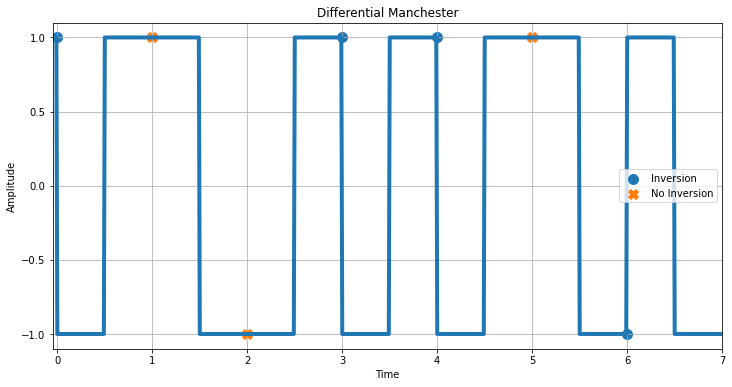

In [70]:
def plotDifferentialManchester(data):
    x=np.arange(-1, len(data), 0.01)
    y=np.empty(0)
    inversion_x=[]
    inversion_y=[]
    no_inversion_x=[]
    no_inversion_y=[]
    #adding a previous state
    y=np.concatenate((y, np.ones(50)*(-1)))
    y=np.concatenate((y, np.ones(50)*(1)))
    prev_state = 1
    i = -1
    for bit in data:
        i+=1
        if bit=='0' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            inversion_x.append(i)
            inversion_y.append(-1)
        elif bit=='0' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            inversion_x.append(i)
            inversion_y.append(1)
        elif bit=='1' and prev_state==-1:
            y=np.concatenate((y, np.ones(50)*(-1)))
            y=np.concatenate((y, np.ones(50)*(1)))
            prev_state=1
            no_inversion_x.append(i)
            no_inversion_y.append(-1)
        elif bit=='1' and prev_state==1:
            y=np.concatenate((y, np.ones(50)*(1)))
            y=np.concatenate((y, np.ones(50)*(-1)))
            no_inversion_x.append(i)
            no_inversion_y.append(1)
            prev_state=-1
    plt.figure(figsize=(12, 6))
    plt.plot(x,y,linewidth=4)
    p1=plt.scatter(inversion_x, inversion_y, marker="o", s=10**2)
    p2=plt.scatter(no_inversion_x, no_inversion_y, marker="X", s=10**2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Differential Manchester')
    plt.xlim([-.05,len(data)])
    plt.yticks([-1,-0.5,0,0.5,1])
    plt.grid('on')
    plt.legend([p1,p2],["Inversion","No Inversion"])
    plt.show()

# For Taking Data Manually
# data=input("Input Binary Data Stream : ")
data = "0110010"
plotDifferentialManchester(data)